In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '.git',
 'data_preprocessing.ipynb',
 'MURA-v1.1.zip',
 '.gitignore',
 'MURA-v1.1']

In [6]:
PATH="MURA-v1.1/"

In [7]:
os.listdir(PATH)

['train_labeled_studies.csv',
 'valid_image_paths.csv',
 'train',
 'valid',
 'valid_labeled_studies.csv',
 'train_image_paths.csv']

In [8]:
train_imgs_path=pd.read_csv(PATH+'train_image_paths.csv')
train_labels=pd.read_csv(PATH+'train_labeled_studies.csv')
test_imgs_path=pd.read_csv(PATH+'valid_image_paths.csv')
test_labels=pd.read_csv(PATH+'valid_labeled_studies.csv')


In [9]:
train_imgs_path.head()

,Img_Path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [10]:
train_imgs_path.shape

(36808, 1)

In [11]:
train_labels.head()

,Img_Path,Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [12]:
train_labels['Label'].value_counts()

0    8280
1    5177
Name: Label, dtype: int64

In [13]:
test_imgs_path.head()

,Img_Path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [14]:
test_imgs_path.shape

(3197, 1)

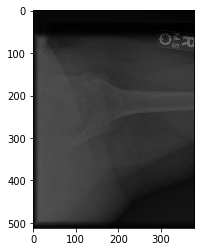

(512, 380, 3)


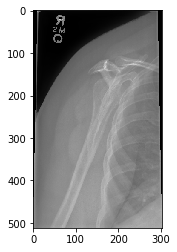

(512, 303, 3)


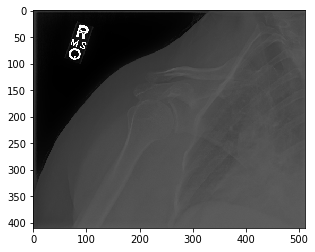

(410, 512, 3)


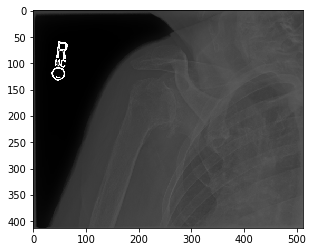

(413, 512, 3)


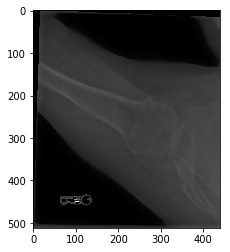

(512, 440, 3)


In [15]:
for path in train_imgs_path.values[:5]:
    img=cv2.imread(path[0])
    plt.imshow(plt.imread(path[0]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

In [16]:
train_labels['Body_Part']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study_Type']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['Body_Part']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study_Type']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])

In [17]:
train_labels.head()

,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,study1


In [18]:
test_labels.head()

,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,WRIST,study1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,WRIST,study2
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,WRIST,study3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,WRIST,study1


In [19]:
import seaborn as sns

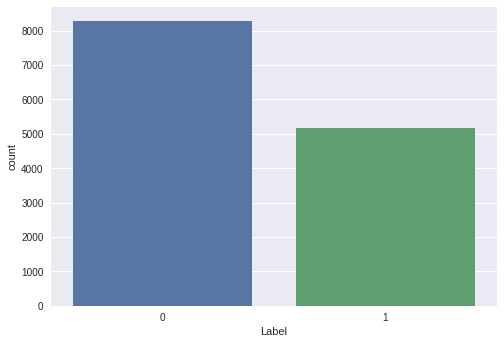

In [20]:
sns.countplot(train_labels['Label'])

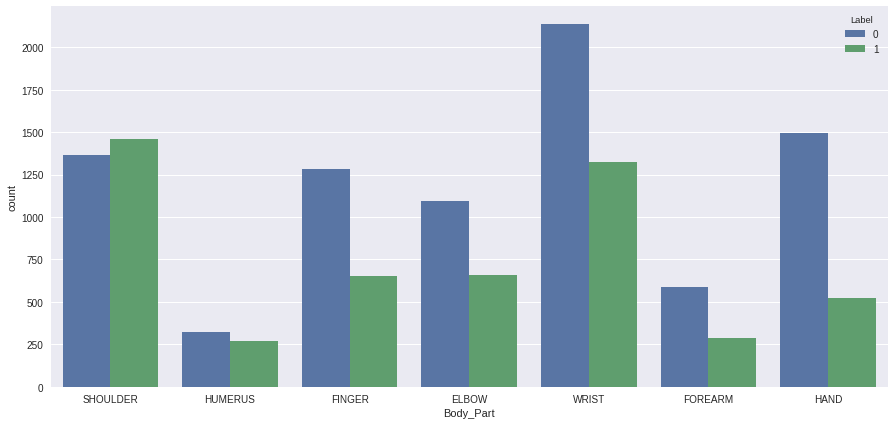

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',hue='Label')

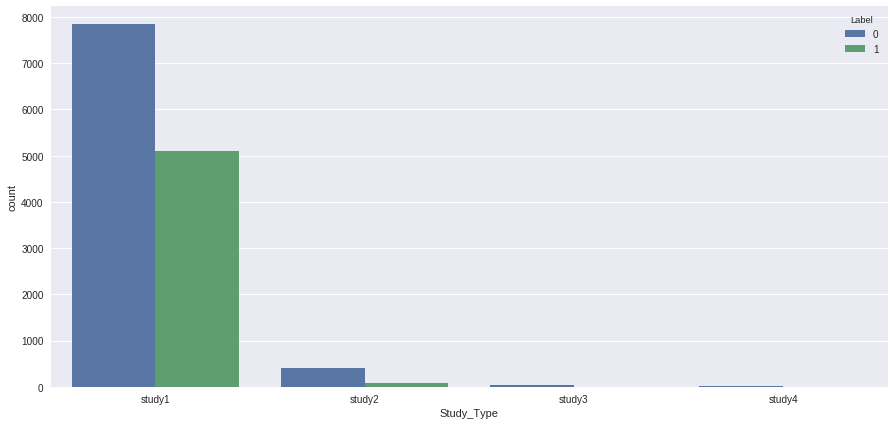

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Study_Type',hue='Label')

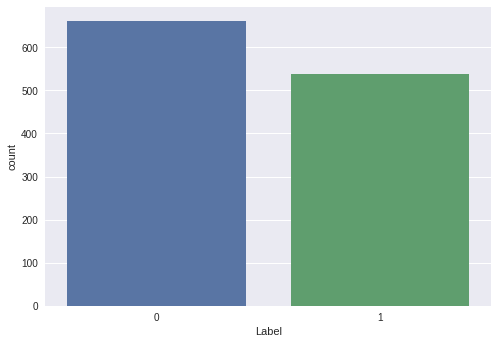

In [23]:
sns.countplot(test_labels['Label'])

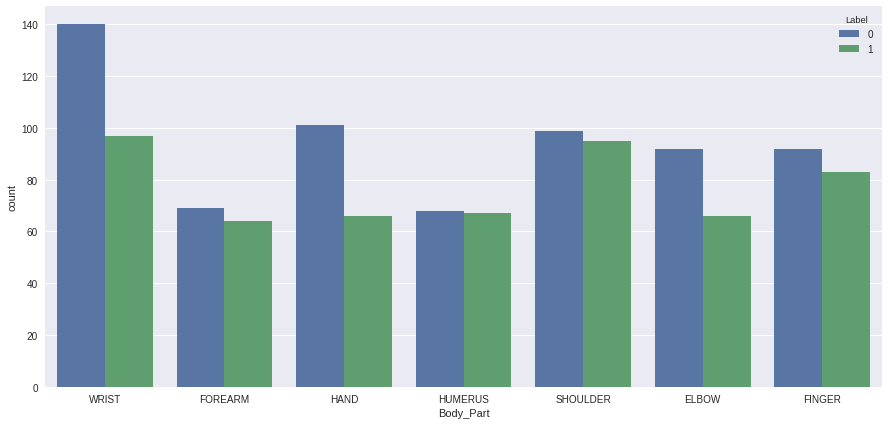

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Body_Part',hue='Label')

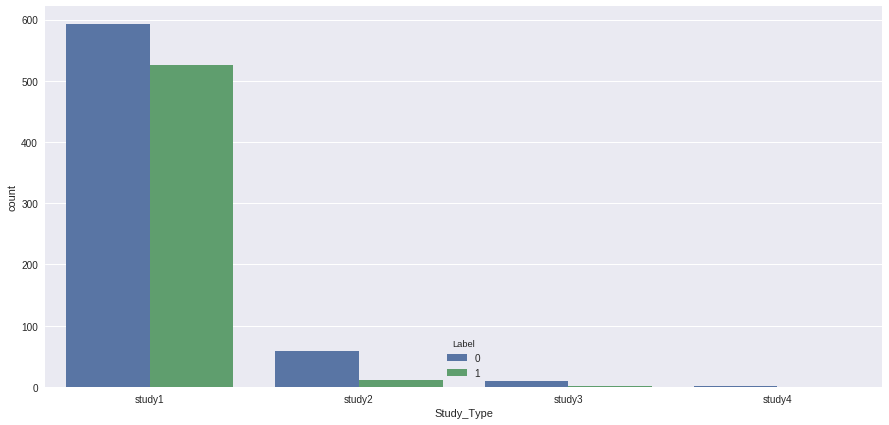

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Study_Type',hue='Label')